In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
import pylab as plt

In [2]:
batch_size = 128
num_classes = 10
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
print(y_train[0])

60000 train samples
10000 test samples
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Label: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


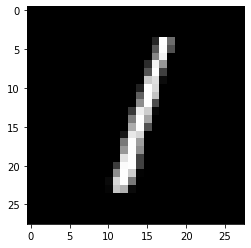

In [3]:
print("Label:",y_test[2:3])
plt.imshow(x_test[2:3].reshape(28,28), cmap='gray')
plt.show()

In [4]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 32)                1056      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


Shape of First Layer (784, 32)
Visualization of First Layer


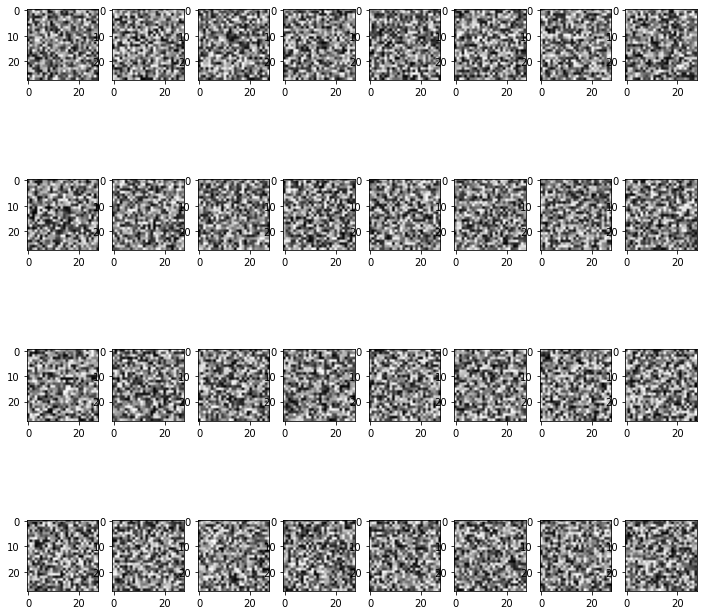

In [5]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [7]:
# Write the Training input and output variables,  size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=2,
                    verbose=2)

Epoch 1/2
469/469 - 12s - loss: 1.6307 - accuracy: 0.5103 - 12s/epoch - 26ms/step
Epoch 2/2
469/469 - 7s - loss: 0.6839 - accuracy: 0.8469 - 7s/epoch - 15ms/step


In [8]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 5s 10ms/step - loss: 0.4689 - accuracy: 0.8870
Test loss: 0.46891000866889954
Test accuracy: 0.8870000243186951


Shape of First Layer (784, 32)
Visualization of First Layer


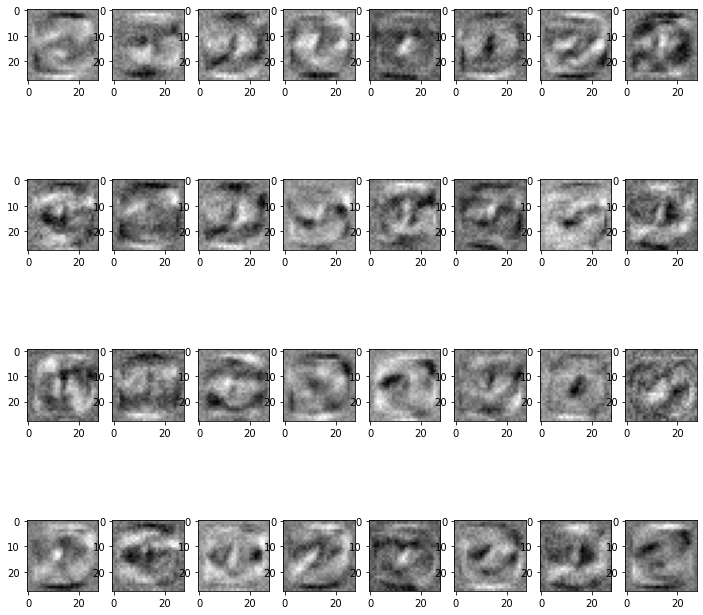

In [9]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [10]:
# Write the index of the test sample to test
prediction = model.predict(x_test[310:311])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 2s 2s/step
Prediction
 [4.1440660e-03 6.5535487e-04 3.2042377e-02 8.5581529e-01 6.0757005e-04
 6.7725793e-02 8.5003311e-03 5.3460506e-04 2.9740879e-02 2.3380973e-04]

Thresholded output
 [0 0 0 1 0 0 0 0 0 0]


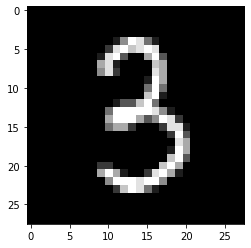

In [11]:
# Write the index of the test sample to show
plt.imshow(x_test[310:311].reshape(28,28),cmap='gray')
plt.show()

In [12]:
!pip install opencv-python


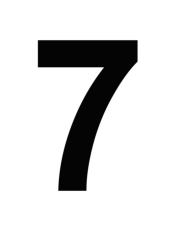

In [13]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('number7.jpg', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

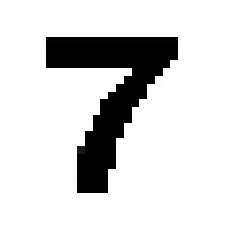

In [14]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('number7.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

In [15]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

1/1 [==============================] - 1s 860ms/step
Prediction Score:
 [1.7720390e-03 8.7355042e-04 2.3226210e-01 6.7608958e-01 1.8008786e-03
 1.5090004e-02 2.5269646e-02 1.4034889e-03 4.4881675e-02 5.5708940e-04]

Thresholded Score:
 [0 0 0 1 0 0 0 0 0 0]

Predicted Digit:
 3


In [16]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [17]:
# load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [18]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
469/469 [==============================] - 16s 19ms/step - loss: 0.3844 - accuracy: 0.9008
Epoch 2/2
469/469 [==============================] - 6s 12ms/step - loss: 0.2954 - accuracy: 0.9200
Test loss: 0.2710786759853363
Test accuracy: 0.9247999787330627


In [19]:
model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(784,)))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 6280      
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 22s 23ms/step - loss: 1.1242 - accuracy: 0.6633 - val_loss: 0.5984 - val_accuracy: 0.8221
Epoch 2/2
469/469 [==============================] - 8s 17ms/step - loss: 0.4766 - accuracy: 0.8645 - val_loss: 0.3782 - val_accuracy: 0.8950
Test loss: 0.3781619966030121
T

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 8)                 6280      
                                                                 
 dense_8 (Dense)             (None, 32)                288       
                                                                 
 dense_9 (Dense)             (None, 10)                330       
                                                                 
Total params: 6,898
Trainable params: 6,898
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 17s 19ms/step - loss: 1.8306 - accuracy: 0.5393 - val_loss: 1.3336 - val_accuracy: 0.6748
Epoch 2/2
469/469 [==============================] - 6s 13ms/step - loss: 0.9981 - accuracy: 0.7586 - val_loss: 0.7487 - val_accuracy: 0.8072
Test loss: 0.7486972212791443
T

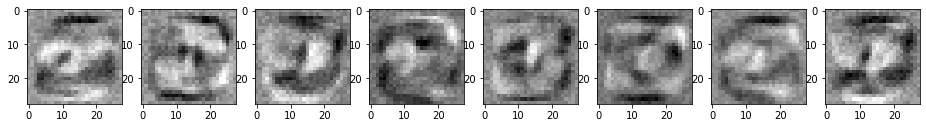

In [20]:
first_layer_size = 8

model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 64)                50240     
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 17s 23ms/step - loss: 0.4033 - accuracy: 0.8880 - val_loss: 0.2256 - val_accuracy: 0.9350
Epoch 2/2
469/469 [==============================] - 9s 19ms/step - loss: 0.1925 - accuracy: 0.9444 - val_loss: 0.1578 - val_accuracy: 0.9519
Test loss: 0.1577565371990203

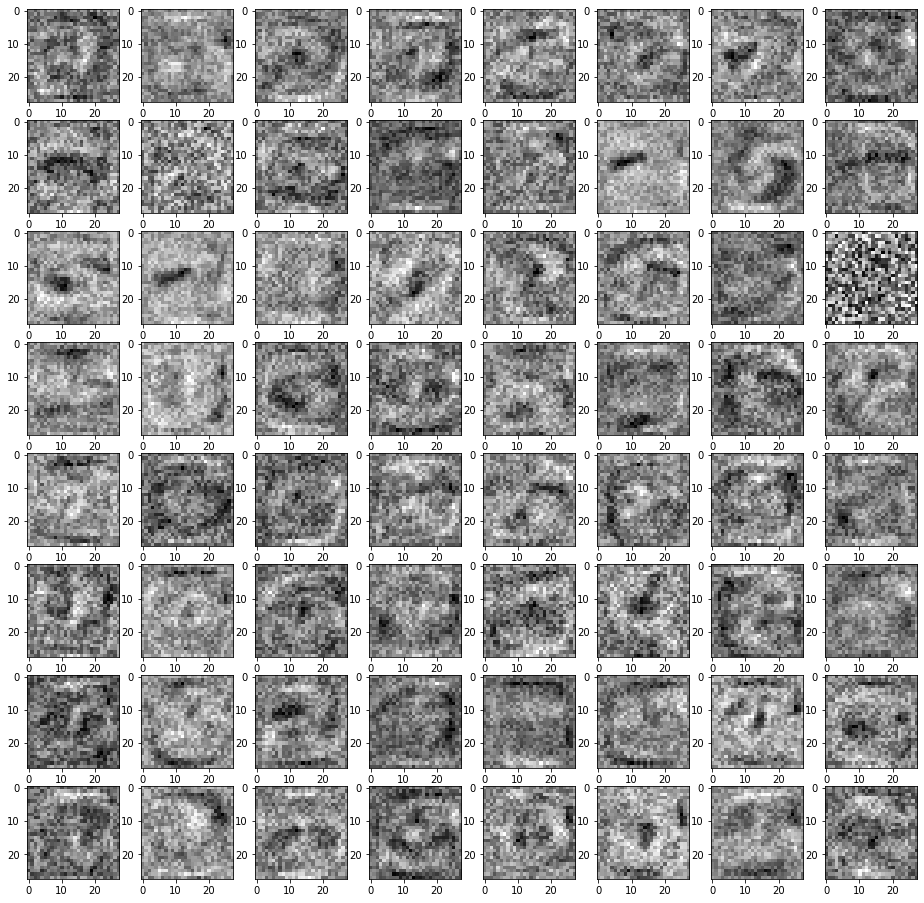

In [21]:
first_layer_size = 64

model = Sequential()
model.add(Dense(first_layer_size, activation='relu', input_shape=(784,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16, 16))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [22]:
model = Sequential()
model.add(Dense(4, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 4)                 3140      
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 18s 22ms/step - loss: 1.4224 - accuracy: 0.5196 - val_loss: 0.9214 - val_accuracy: 0.7231
Epoch 2/2
469/469 [==============================] - 12s 26ms/step - loss: 0.8191 - accuracy: 0.7580 - val_loss: 0.7065 - val_accuracy: 0.7858
Test loss: 0.7064522504806519
Test accuracy: 0.7857999801635742
